## **Code Setup**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')

## **Load Dataset**

In [ ]:
# Load the dataset
raw_df = pd.read_excel('/content/drive/MyDrive/Data/raw_data.xlsx')

In [ ]:
raw_df

,iso_code,location,date,Week number,Year,Unique,total_cases,new_cases,total_vaccinations,people_vaccinated,people_fully_vaccinated,stringency_index,population_density,aged_65_older,aged_70_older,human_development_index,population,Average Mortality Rate
0,AUS,Australia,2020-01-03,1,2020,AUS12020,NaN,0.0,NaN,NaN,NaN,0.0,3.202,15.504,10.129,0.944,26177410,0.059465
1,AUS,Australia,2020-01-04,1,2020,AUS12020,NaN,0.0,NaN,NaN,NaN,0.0,3.202,15.504,10.129,0.944,26177410,0.059465
2,AUS,Australia,2020-01-05,2,2020,AUS22020,NaN,0.0,NaN,NaN,NaN,0.0,3.202,15.504,10.129,0.944,26177410,0.058977
3,AUS,Australia,2020-01-06,2,2020,AUS22020,NaN,0.0,NaN,NaN,NaN,0.0,3.202,15.504,10.129,0.944,26177410,0.058977
4,AUS,Australia,2020-01-07,2,2020,AUS22020,NaN,0.0,NaN,NaN,NaN,0.0,3.202,15.504,10.129,0.944,26177410,0.058977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40059,USA,United States,2023-06-03,22,2023,USA222023,103436829.0,0.0,NaN,NaN,NaN,NaN,35.608,15.413,9.732,0.926,338289856,0.090357
40060,USA,United States,2023-06-04,23,2023,USA232023,103436829.0,0.0,NaN,NaN,NaN,NaN,35.608,15.413,9.732,0.926,338289856,0.091093
40061,USA,United States,2023-06-05,23,2023,USA232023,103436829.0,0.0,NaN,NaN,NaN,NaN,35.608,15.413,9.732,0.926,338289856,0.091093
40062,USA,United States,2023-06-06,23,2023,USA232023,103436829.0,0.0,NaN,NaN,NaN,NaN,35.608,15.413,9.732,0.926,338289856,0.091093


## **Data Cleaning**

In [ ]:
raw_df.fillna(0,inplace = True)

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40064 entries, 0 to 40063
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   iso_code                 40064 non-null  object        
 1   location                 40064 non-null  object        
 2   date                     40064 non-null  datetime64[ns]
 3   Week number              40064 non-null  int64         
 4   Year                     40064 non-null  int64         
 5   Unique                   40064 non-null  object        
 6   total_cases              40064 non-null  float64       
 7   new_cases                40064 non-null  float64       
 8   total_vaccinations       40064 non-null  float64       
 9   people_vaccinated        40064 non-null  float64       
 10  people_fully_vaccinated  40064 non-null  float64       
 11  stringency_index         40064 non-null  float64       
 12  population_density       40064 n

In [ ]:
raw_df = raw_df.astype({'new_cases' : 'int', 'total_cases' : 'int', 'total_vaccinations' : 'int', 'people_fully_vaccinated' : 'int', 'Average Mortality Rate' : 'float'})

## **Exploratory Analysis**

#### **Data Manipulation**

In [ ]:
mortality_rate = raw_df.groupby('iso_code').mean()['Average Mortality Rate'].reset_index()
mortality_rate['Average Mortality Rate'] = round(mortality_rate['Average Mortality Rate']*100, 2)
mortality_rate.head()

,iso_code,Average Mortality Rate
0,AUS,6.78
1,AUT,10.15
2,BEL,10.19
3,BGR,18.50
4,CAN,8.33


In [ ]:
mortality_rate_23 = raw_df[raw_df['Year']==2023].groupby('iso_code').mean()['Average Mortality Rate'].reset_index()
mortality_rate_23['Average Mortality Rate'] = round(mortality_rate_23['Average Mortality Rate']*100, 2)
mortality_rate_23.head()

,iso_code,Average Mortality Rate
0,AUS,6.90
1,AUT,10.22
2,BEL,9.98
3,BGR,15.42
4,CAN,8.81


In [ ]:
vaccinations = raw_df.groupby('iso_code').agg({'people_fully_vaccinated' : 'max', 'population' : 'max'}).reset_index()
vaccinations['vaccinated_percentage'] = vaccinations['people_fully_vaccinated']/vaccinations['population']
vaccinations['vaccinated_percentage'] = round(vaccinations['vaccinated_percentage']*100)
vaccinations.head()

,iso_code,people_fully_vaccinated,population,vaccinated_percentage
0,AUS,21648824,26177410,83.0
1,AUT,6683091,8939617,75.0
2,BEL,9168920,11655923,79.0
3,BGR,2077682,6781955,31.0
4,CAN,31762130,38454328,83.0


In [ ]:
lockdown_stringency = raw_df.groupby('iso_code').agg({'stringency_index' : 'sum'}).reset_index()
lockdown_stringency.head()

,iso_code,stringency_index
0,AUS,51727.94
1,AUT,53860.86
2,BEL,42795.83
3,BGR,39639.66
4,CAN,55141.10


In [ ]:
covid = raw_df[raw_df['Year']==2023].groupby('iso_code').agg({'new_cases' : 'sum', 'population' : 'max'}).reset_index()
covid['case_rate'] = covid['new_cases']/covid['population']
covid['case_rate'] = covid['case_rate']*100
covid.head()

,iso_code,new_cases,population,case_rate
0,AUS,634480,26177410,2.423769
1,AUT,377222,8939617,4.219666
2,BEL,114858,11655923,0.985405
3,BGR,15893,6781955,0.234342
4,CAN,188633,38454328,0.490538


In [ ]:
long_covid = raw_df[raw_df['Year'].isin([2020,2021,2022])].groupby('iso_code').agg({'total_cases' : 'max', 'population' : 'max'}).reset_index()
long_covid['case_rate'] = long_covid['total_cases']/long_covid['population']
long_covid['case_rate'] = long_covid['case_rate']*100
long_covid.head()

,iso_code,total_cases,population,case_rate
0,AUS,10785559,26177410,41.201780
1,AUT,5700848,8939617,63.770607
2,BEL,4684904,11655923,40.193333
3,BGR,1292033,6781955,19.051041
4,CAN,4492624,38454328,11.683013


In [ ]:
raw_df_23 = raw_df[raw_df['Year']==2023]
raw_df_23.head()

,iso_code,location,date,Week number,Year,Unique,total_cases,new_cases,total_vaccinations,people_vaccinated,people_fully_vaccinated,stringency_index,population_density,aged_65_older,aged_70_older,human_development_index,population,Average Mortality Rate
1094,AUS,Australia,2023-01-01,1,2023,AUS12023,10785559,0,0,0.0,0,0.0,3.202,15.504,10.129,0.944,26177410,0.069181
1095,AUS,Australia,2023-01-02,1,2023,AUS12023,10850078,64519,0,0.0,0,0.0,3.202,15.504,10.129,0.944,26177410,0.069181
1096,AUS,Australia,2023-01-03,1,2023,AUS12023,10850078,0,0,0.0,0,0.0,3.202,15.504,10.129,0.944,26177410,0.069181
1097,AUS,Australia,2023-01-04,1,2023,AUS12023,10850078,0,0,0.0,0,0.0,3.202,15.504,10.129,0.944,26177410,0.069181
1098,AUS,Australia,2023-01-05,1,2023,AUS12023,10850078,0,63611887,0.0,0,0.0,3.202,15.504,10.129,0.944,26177410,0.069181


In [ ]:
aggregate_mortality_cases = raw_df_23.groupby(['Week number']).agg({'new_cases' : 'sum', 'Average Mortality Rate' : 'mean'}).reset_index()
aggregate_mortality_cases['Average Mortality Rate'] = round(aggregate_mortality_cases['Average Mortality Rate']*100,2)
aggregate_mortality_cases

,Week number,new_cases,Average Mortality Rate
0,1,1521896,12.54
1,2,1240761,12.05
2,3,859987,11.48
3,4,745685,10.95
4,5,701792,10.87
5,6,668280,10.74
6,7,657072,10.79
7,8,697451,10.70
8,9,638786,10.53
9,10,556069,10.56


#### **Temporal Analysis**

In [ ]:
raw_df_23['Week number'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

##### **Covid Temporal Analysis (2023)**

In [ ]:
covid_week_1_8 = raw_df_23[raw_df_23['Week number'] < 9].groupby(['iso_code']).agg({'new_cases' : 'sum', 'population' : 'max', 'Average Mortality Rate' : 'mean'}).reset_index()
covid_week_1_8['Average Mortality Rate'] = round(covid_week_1_8['Average Mortality Rate']*100,2)
covid_week_1_8['case_rate'] = covid_week_1_8['new_cases'] / covid_week_1_8['population']
covid_week_1_8['case_rate'] = covid_week_1_8['case_rate']*100
covid_week_1_8

,iso_code,new_cases,population,Average Mortality Rate,case_rate
0,AUS,235115,26177410,6.50,0.898160
1,AUT,190360,8939617,11.08,2.129398
2,BEL,42442,11655923,10.95,0.364124
3,BGR,4581,6781955,16.84,0.067547
4,CAN,99283,38454328,9.91,0.258184
5,CHL,126601,19603736,6.45,0.645800
6,CZE,27846,10493990,11.98,0.265352
7,DEU,738608,83369840,13.57,0.885941
8,DNK,14536,5882259,10.53,0.247116
9,ESP,79078,47558632,11.01,0.166275


In [ ]:
covid_week_8_16 = raw_df_23[(raw_df_23['Week number'] > 8) & (raw_df_23['Week number'] < 17)].groupby(['iso_code']).agg({'new_cases' : 'sum', 'population' : 'max', 'Average Mortality Rate' : 'mean'}).reset_index()
covid_week_8_16['Average Mortality Rate'] = round(covid_week_8_16['Average Mortality Rate']*100,2)
covid_week_8_16['case_rate'] = covid_week_8_16['new_cases'] / covid_week_8_16['population']
covid_week_8_16['case_rate'] = covid_week_8_16['case_rate']*100
covid_week_8_16

,iso_code,new_cases,population,Average Mortality Rate,case_rate
0,AUS,192530,26177410,6.79,0.735481
1,AUT,167163,8939617,10.22,1.869912
2,BEL,64506,11655923,9.92,0.553418
3,BGR,6630,6781955,14.63,0.097759
4,CAN,56276,38454328,8.21,0.146345
5,CHL,119299,19603736,6.34,0.608552
6,CZE,31417,10493990,11.41,0.299381
7,DEU,270784,83369840,12.95,0.324799
8,DNK,8136,5882259,10.04,0.138314
9,ESP,61716,47558632,9.56,0.129768


In [ ]:
covid_week_16_23 = raw_df_23[(raw_df_23['Week number'] > 16) & (raw_df_23['Week number'] < 24)].groupby(['iso_code']).agg({'new_cases' : 'sum', 'population' : 'max', 'Average Mortality Rate' : 'mean'}).reset_index()
covid_week_16_23['Average Mortality Rate'] = round(covid_week_16_23['Average Mortality Rate']*100,2)
covid_week_16_23['case_rate'] = covid_week_16_23['new_cases'] / covid_week_16_23['population']
covid_week_16_23['case_rate'] = covid_week_16_23['case_rate']*100
covid_week_16_23

,iso_code,new_cases,population,Average Mortality Rate,case_rate
0,AUS,206835,26177410,7.53,0.790128
1,AUT,19699,8939617,9.18,0.220356
2,BEL,7910,11655923,8.88,0.067862
3,BGR,4682,6781955,14.67,0.069036
4,CAN,33074,38454328,8.19,0.086009
5,CHL,9344,19603736,7.16,0.047664
6,CZE,2908,10493990,10.41,0.027711
7,DEU,35458,83369840,11.51,0.042531
8,DNK,2784,5882259,9.38,0.047329
9,ESP,65525,47558632,9.25,0.137777


##### **Vaccinations Temporal Analysis (2023)**

In [ ]:
vaccine_week_1_8 = raw_df_23[raw_df_23['Week number'] < 9].groupby(['iso_code']).agg({'people_fully_vaccinated' : 'max', 'population' : 'max', 'Average Mortality Rate' : 'mean'}).reset_index()
vaccine_week_1_8['Average Mortality Rate'] = round(vaccine_week_1_8['Average Mortality Rate']*100,2)
vaccine_week_1_8['vaccinated_percentage'] = vaccine_week_1_8['people_fully_vaccinated']/vaccine_week_1_8['population']
vaccine_week_1_8['vaccinated_percentage'] = round(vaccine_week_1_8['vaccinated_percentage']*100)
vaccine_week_1_8

,iso_code,people_fully_vaccinated,population,Average Mortality Rate,vaccinated_percentage
0,AUS,0,26177410,6.50,0.0
1,AUT,6682313,8939617,11.08,75.0
2,BEL,9168343,11655923,10.95,79.0
3,BGR,2075993,6781955,16.84,31.0
4,CAN,31762130,38454328,9.91,83.0
5,CHL,17700117,19603736,6.45,90.0
6,CZE,6892392,10493990,11.98,66.0
7,DEU,63558697,83369840,13.57,76.0
8,DNK,4735936,5882259,10.53,81.0
9,ESP,40730568,47558632,11.01,86.0


In [ ]:
vaccine_week_9_16 = raw_df_23[(raw_df_23['Week number'] > 9) & (raw_df_23['Week number'] < 17)].groupby(['iso_code']).agg({'people_fully_vaccinated' : 'max', 'population' : 'max', 'Average Mortality Rate' : 'mean'}).reset_index()
vaccine_week_9_16['Average Mortality Rate'] = round(vaccine_week_9_16['Average Mortality Rate']*100,2)
vaccine_week_9_16['vaccinated_percentage'] = vaccine_week_9_16['people_fully_vaccinated']/vaccine_week_9_16['population']
vaccine_week_9_16['vaccinated_percentage'] = round(vaccine_week_9_16['vaccinated_percentage']*100)
vaccine_week_9_16

,iso_code,people_fully_vaccinated,population,Average Mortality Rate,vaccinated_percentage
0,AUS,21648824,26177410,6.78,83.0
1,AUT,6682982,8939617,10.14,75.0
2,BEL,9168768,11655923,9.85,79.0
3,BGR,2077090,6781955,14.56,31.0
4,CAN,0,38454328,8.15,0.0
5,CHL,0,19603736,6.32,0.0
6,CZE,6893063,10493990,11.42,66.0
7,DEU,63563414,83369840,12.92,76.0
8,DNK,4736256,5882259,10.07,81.0
9,ESP,40735254,47558632,9.40,86.0


In [ ]:
vaccine_week_17_23 = raw_df_23[(raw_df_23['Week number'] > 16) & (raw_df_23['Week number'] < 24)].groupby(['iso_code']).agg({'people_fully_vaccinated' : 'max', 'population' : 'max', 'Average Mortality Rate' : 'mean'}).reset_index()
vaccine_week_17_23['Average Mortality Rate'] = round(vaccine_week_17_23['Average Mortality Rate']*100,2)
vaccine_week_17_23['vaccinated_percentage'] = vaccine_week_17_23['people_fully_vaccinated']/vaccine_week_17_23['population']
vaccine_week_17_23['vaccinated_percentage'] = round(vaccine_week_17_23['vaccinated_percentage']*100)
vaccine_week_17_23

,iso_code,people_fully_vaccinated,population,Average Mortality Rate,vaccinated_percentage
0,AUS,0,26177410,7.53,0.0
1,AUT,6683091,8939617,9.18,75.0
2,BEL,9168920,11655923,8.88,79.0
3,BGR,2077682,6781955,14.67,31.0
4,CAN,0,38454328,8.19,0.0
5,CHL,0,19603736,7.16,0.0
6,CZE,6893305,10493990,10.41,66.0
7,DEU,0,83369840,11.51,0.0
8,DNK,4736323,5882259,9.38,81.0
9,ESP,40739123,47558632,9.25,86.0


## **Regression Model**

In [ ]:
def linear_regression(X, y, labels=None, plt_title=None, x_label=None):
    """
    Perform linear regression and visualize the results.

    Parameters:
        X (numpy array or pandas Series): Feature variable.
        y (numpy array or pandas Series): Target variable.
        labels (numpy array or pandas Series, optional): Labels for data points (countries).

    Returns:
        model (statsmodels.regression.linear_model.RegressionResultsWrapper): The fitted linear regression model.
        y_pred (numpy array): Predicted target variable values.
        r2 (float): R-squared value indicating the goodness of fit.
        p_value (float): P-value for the coefficient of the linear regression model.
    """
    X = X.values.reshape(-1, 1) if isinstance(X, pd.Series) else X.reshape(-1, 1)
    y = y.values if isinstance(y, pd.Series) else y

    # Perform linear regression using statsmodels
    X_with_intercept = sm.add_constant(X)
    model = sm.OLS(y, X_with_intercept).fit()
    y_pred = model.predict(X_with_intercept)
    p_value = model.pvalues[1]


    # Calculate R-squared value
    r2 = r2_score(y, y_pred)

    # Plot the data and regression line
    plt.scatter(X, y)

    if labels is not None:
        labels = labels.values if isinstance(labels, pd.Series) else labels
        for i, label in enumerate(labels):
            plt.annotate(label, (X[i], y[i]), textcoords="offset points", xytext=(0, 5), ha='center')

    plt.plot(X, y_pred, color='red')
    plt.xlabel(x_label)
    plt.ylabel('Mortality Rate %')
    plt.title(plt_title)
    # plt.text(max(X), max(y_pred), f'R² = {r2:.2f}', ha='right', va='top')

    # Display the plot
    plt.show()

    return model, y_pred, r2, p_value


## **Results**

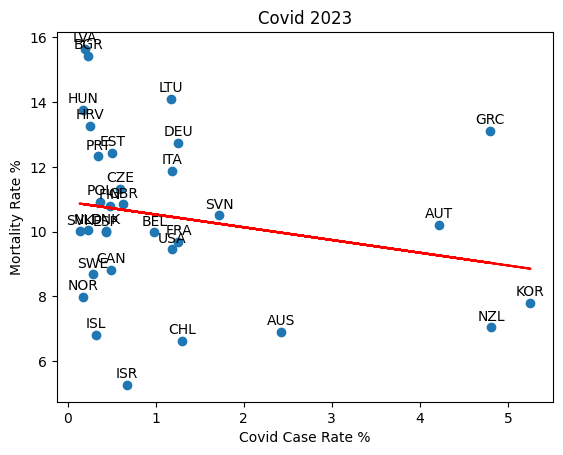

P-value: 0.21851799422542542
R-squared Value: 0.05001926011685287


In [ ]:
X = covid['case_rate']
# y = mortality_rate['Average Mortality Rate']
y = mortality_rate_23['Average Mortality Rate']
labels = covid['iso_code']
title = 'Covid 2023'
x_label = 'Covid Case Rate %'

model, y_pred, r2, p = linear_regression(X, y, labels=labels, plt_title=title, x_label=x_label)

print("P-value:", p)
print("R-squared Value:", r2)

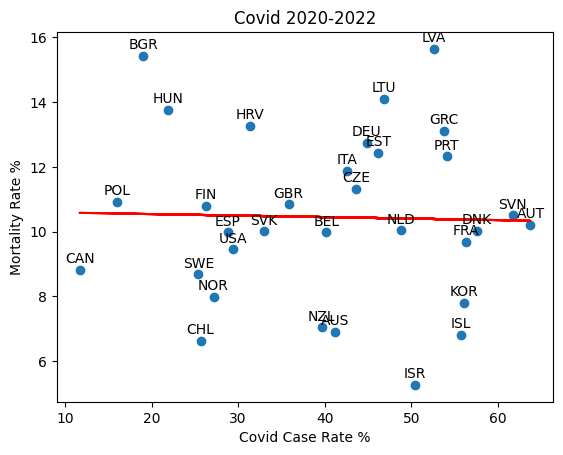

P-value: 0.8896865613169167
R-squared Value: 0.0006518261723762464


In [ ]:
X = long_covid['case_rate']
# y = mortality_rate['Average Mortality Rate']
y = mortality_rate_23['Average Mortality Rate']
labels = long_covid['iso_code']
title = 'Covid 2020-2022'
x_label = 'Covid Case Rate %'

model, y_pred, r2, p = linear_regression(X, y, labels=labels, plt_title=title, x_label=x_label)

print("P-value:", p)
print("R-squared Value:", r2)

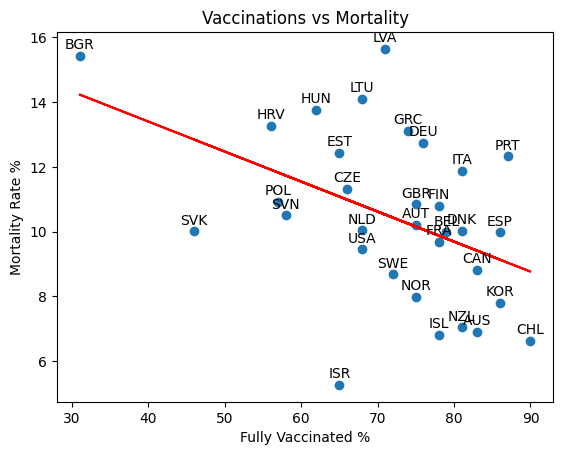

P-value: 0.009290220527672538
R-squared Value: 0.20487386758136727


In [ ]:
X = vaccinations['vaccinated_percentage']
# y = mortality_rate['Average Mortality Rate']
y = mortality_rate_23['Average Mortality Rate']
labels = vaccinations['iso_code']
title = 'Vaccinations vs Mortality'
x_label = 'Fully Vaccinated %'

model, y_pred, r2, p = linear_regression(X, y, labels=labels, plt_title=title, x_label=x_label)

print("P-value:", p)
print("R-squared Value:", r2)

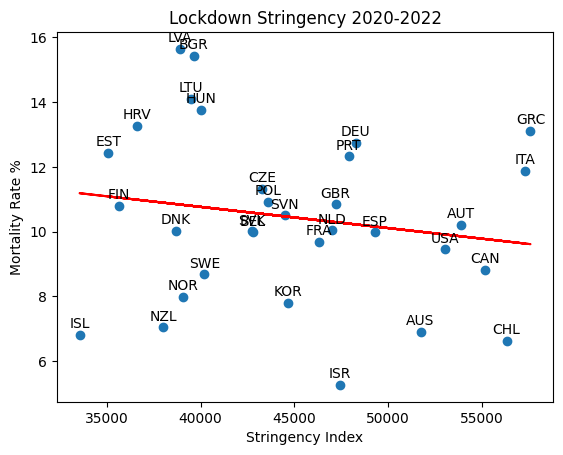

P-value: 0.34290929026509676
R-squared Value: 0.030026630177052982


In [ ]:
X = lockdown_stringency['stringency_index']
# y = mortality_rate['Average Mortality Rate']
y = mortality_rate_23['Average Mortality Rate']
labels = lockdown_stringency['iso_code']
title = 'Lockdown Stringency 2020-2022'
x_label = 'Stringency Index'

model, y_pred, r2, p = linear_regression(X, y, labels=labels, plt_title=title, x_label=x_label)

print("P-value:", p)
print("R-squared Value:", r2)

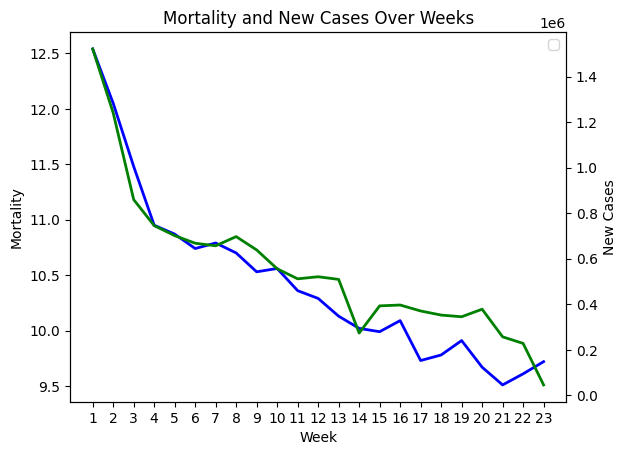

In [ ]:
x = aggregate_mortality_cases['Week number']
y = aggregate_mortality_cases['Average Mortality Rate']
z = aggregate_mortality_cases['new_cases']

# Create figure and axes
fig, ax1 = plt.subplots()

# Scatter plot for mortality
# ax1.scatter(x, y, color='blue', label='Mortality')
ax1.set_xlabel('Week')
ax1.set_ylabel('Mortality')
ax1.tick_params(axis='y')

# Create a twin Axes sharing the xaxis
ax2 = ax1.twinx()

# Scatter plot for new cases
# ax2.scatter(x, z, color='green', label='New Cases')
ax2.set_ylabel('New Cases')
ax2.tick_params(axis='y')

# Adding a continuous line to each scatter plot
ax1.plot(x, y, color='blue', linestyle='-', linewidth=2)
ax2.plot(x, z, color='green', linestyle='-', linewidth=2)

# Adding xticks
plt.xticks(x, x)

# Adding a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Display the plot
plt.title('Mortality and New Cases Over Weeks')
plt.show()

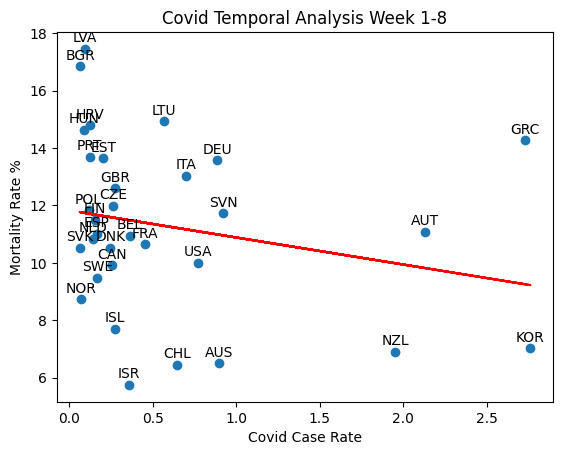

P-value: 0.19563817068561845
R-squared Value: 0.055174259859306685


In [ ]:
X = covid_week_1_8['case_rate']
# y = mortality_rate['Average Mortality Rate']
y = covid_week_1_8['Average Mortality Rate']
labels = covid_week_1_8['iso_code']
title = 'Covid Temporal Analysis Week 1-8'
x_label = 'Covid Case Rate'

model, y_pred, r2, p = linear_regression(X, y, labels=labels, plt_title=title, x_label=x_label)

print("P-value:", p)
print("R-squared Value:", r2)

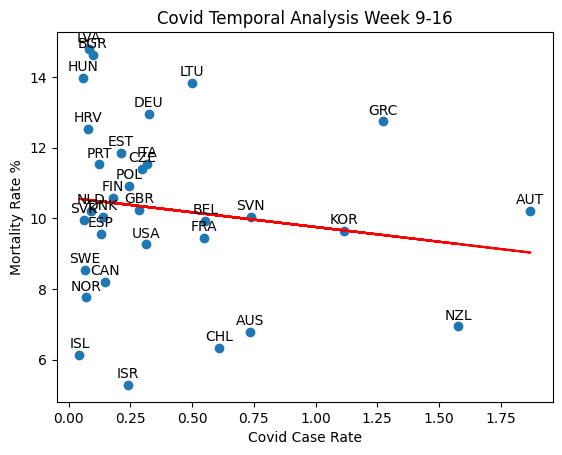

P-value: 0.396054300556937
R-squared Value: 0.024116140605266234


In [ ]:
X = covid_week_8_16['case_rate']
# y = mortality_rate['Average Mortality Rate']
y = covid_week_8_16['Average Mortality Rate']
labels = covid_week_8_16['iso_code']
title = 'Covid Temporal Analysis Week 9-16'
x_label = 'Covid Case Rate'

model, y_pred, r2, p = linear_regression(X, y, labels=labels, plt_title=title, x_label=x_label)

print("P-value:", p)
print("R-squared Value:", r2)

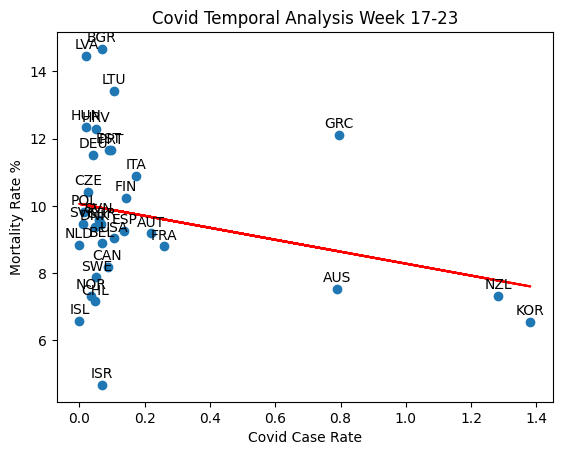

P-value: 0.1410340754769805
R-squared Value: 0.07079628301428731


In [ ]:
X = covid_week_16_23['case_rate']
# y = mortality_rate['Average Mortality Rate']
y = covid_week_16_23['Average Mortality Rate']
labels = covid_week_16_23['iso_code']
title = 'Covid Temporal Analysis Week 17-23'
x_label = 'Covid Case Rate'

model, y_pred, r2, p = linear_regression(X, y, labels=labels, plt_title=title, x_label=x_label)

print("P-value:", p)
print("R-squared Value:", r2)

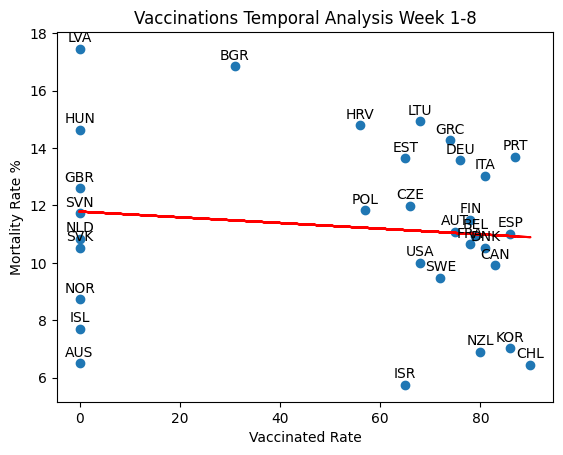

P-value: 0.5266877032132491
R-squared Value: 0.013491647683248287


In [ ]:
X = vaccine_week_1_8['vaccinated_percentage']
# y = mortality_rate['Average Mortality Rate']
y = vaccine_week_1_8['Average Mortality Rate']
labels = vaccine_week_1_8['iso_code']
title = 'Vaccinations Temporal Analysis Week 1-8'
x_label = 'Vaccinated Rate'

model, y_pred, r2, p = linear_regression(X, y, labels=labels, plt_title=title, x_label=x_label)

print("P-value:", p)
print("R-squared Value:", r2)

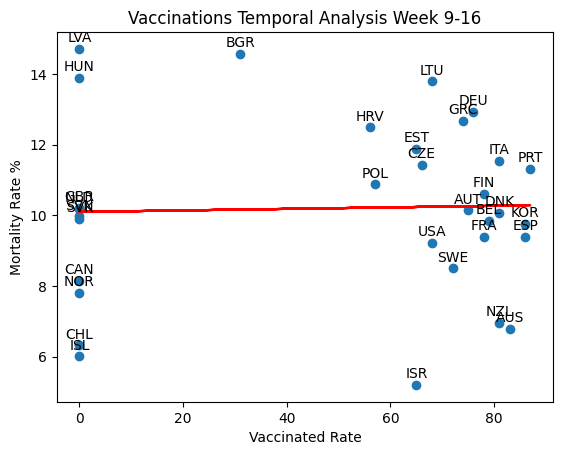

P-value: 0.8656360621478396
R-squared Value: 0.0009698987532751335


In [ ]:
X = vaccine_week_9_16['vaccinated_percentage']
# y = mortality_rate['Average Mortality Rate']
y = vaccine_week_9_16['Average Mortality Rate']
labels = vaccine_week_9_16['iso_code']
title = 'Vaccinations Temporal Analysis Week 9-16'
x_label = 'Vaccinated Rate'

model, y_pred, r2, p = linear_regression(X, y, labels=labels, plt_title=title, x_label=x_label)

print("P-value:", p)
print("R-squared Value:", r2)

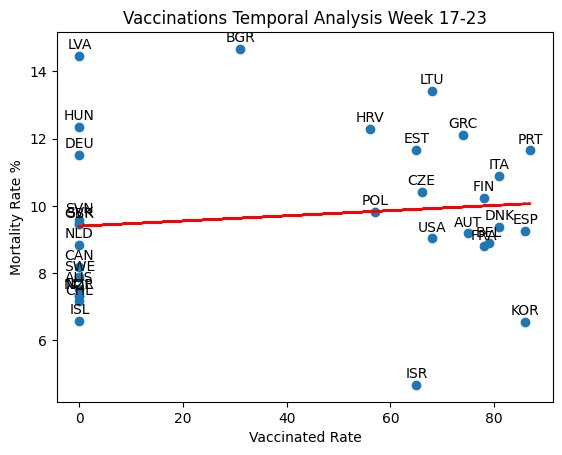

P-value: 0.5038489068094665
R-squared Value: 0.015029854461774184


In [ ]:
X = vaccine_week_17_23['vaccinated_percentage']
# y = mortality_rate['Average Mortality Rate']
y = vaccine_week_17_23['Average Mortality Rate']
labels = vaccine_week_17_23['iso_code']
title = 'Vaccinations Temporal Analysis Week 17-23'
x_label = 'Vaccinated Rate'

model, y_pred, r2, p = linear_regression(X, y, labels=labels, plt_title=title, x_label=x_label)

print("P-value:", p)
print("R-squared Value:", r2)